In [8]:
import re
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
# stop_words+=["polyurethane","poly","composite","protein","drug","acid","biocompatibility","tissue","shape","approach","enhanced","controlled","device","different","technique","process","study","response","-","","preparation","high","use","development","formation","release","method","structure","system","design","matrix","mechanical","delivery","characterization","biomaterial","biomaterials","cell","cells","biomedical","applications","application","properties","using","engineering","materials","study","effect","effects","based","human","novel","evaluation","review","surface","surfaces","new","analysis","biomedical applications","potential","behavior","model","material","biological","growth","via","influence","activity"]

def openfile(path):
    f=open(path)
    text=f.read()
    f.close() 
    all_articles=text.split("\n\n")
    return all_articles



def get_wordnet_pos(pos_tag):  
    # if pos tag starts with 'J'
    if pos_tag.startswith('J'):
        # return wordnet tag "ADJ"
        return wordnet.ADJ   
    # if pos tag starts with 'V'
    elif pos_tag.startswith('V'):
        # return wordnet tag "VERB"
        return wordnet.VERB   
    # if pos tag starts with 'N'
    elif pos_tag.startswith('N'):
        # return wordnet tag "NOUN"
        return wordnet.NOUN  
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        # be default, return wordnet tag "NOUN"
        return wordnet.NOUN




def get_key_tis(all_articles,keywords_titles,publish_date,split_doc_by_date):
    pattern=r'\w[\w\.@_-]*\w'
    for art in all_articles:
        if ("\nDE " in art) and ("\nTI " in art) and ("\nID " in art) and ("\nSO " in art) and ("\nPY " in art):
            DEs = re.findall(r'\sDE[ ].*[\s\w;-]*\sID', art)
            TIs = re.findall(r'\sTI[ ].*[\s\w;:,.!\/)(-]*\sSO', art)
            years = re.findall(r'\sPY [0-9]+', art)
            if len(DEs)==1 and len(TIs)==1 and len(years)==1:
                sentence = ""
                for DE in DEs:
                    DE=DE.split("ID")[0]
                    DE=DE.split("DE")[1].strip().lower()
                    DE=re.sub(r"\s+", ' ',DE)
#                     sentence = sentence + DE + ". "
                    keyword=DE.split("; ")
                for TI in TIs:
                    TI=TI.split("SO")[0]
                    TI=TI.split("TI")[1].strip().lower()
                    TI=re.sub(r"\s+", ' ',TI)
#                     sentence = sentence + TI
#                     sentence=re.sub('[^a-zA-Z0-9;.,-]',' ',sentence)
#                     sentence=re.sub('\s+',' ',sentence)
                    TI=re.sub('[^a-zA-Z0-9;.,-]',' ',TI)
                    TI=re.sub('\s+',' ',TI)
                    title=TI.split(" ")
                
                tokens = keyword + title
                
#                 tokens = nltk.regexp_tokenize(sentence, pattern)
    
#                 tagged_tokens= nltk.pos_tag(tokens)
#                 lemmatized_words=[wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) \
#                       for (word, tag) in tagged_tokens if word not in stop_words]
                lemmatized_words=[wordnet_lemmatizer.lemmatize(word) \
                      for word in tokens if word not in stop_words]
    
                new_str = ""
                for word in lemmatized_words:
                    new_str = new_str + word + " "
                new_str = new_str.strip()                
                keywords_titles.append(new_str)
                
                year = years[0]
                year = year.split("PY")[1].strip()
                publish_date.append(year)
                
                if year not in split_doc_by_date:
                    split_doc_by_date[year] = [new_str]
                else:
                    split_doc_by_date[year].append(new_str)
                


if __name__ == "__main__":
    split_doc_by_date = {}
    keywords_titles = []
    publish_date = []
    count = 0
    
    for i in range(1,42):
        path = "/Users/Jingsi/Desktop/A_Wiley/data_new/biomaterial_data/savedrecs%d.txt"%i
#         path = "/Users/Jingsi/Desktop/A_Wiley/data_new/Review/biomaterial_data/savedrecs%d.txt"%i
        all_articles = openfile(path)
        get_key_tis(all_articles,keywords_titles,publish_date,split_doc_by_date)
        count += len(all_articles)
        
    for i in range(1,48):
        path = "/Users/Jingsi/Desktop/A_Wiley/data_new/biomedical_data/savedrecs%d.txt"%i
#         path = "/Users/Jingsi/Desktop/A_Wiley/data_new/Review/biomedical_data/savedrecs%d.txt"%i
        all_articles = openfile(path)
        get_key_tis(all_articles,keywords_titles,publish_date,split_doc_by_date)
        count += len(all_articles)
    
    print(("len of total: ",len(keywords_titles)))
    print(("len of total: ",len(publish_date)))
    print("total count:", count)

('len of total: ', 27946)
('len of total: ', 27946)
total count: 43568


In [9]:
print(len(split_doc_by_date["2018"]))
print(split_doc_by_date["2018"][0])

2986
fire retardancy thermal analysis thermal properties biomaterial preparation novel agar sodium alginate fire-retardancy film


In [10]:
# topics = [['regeneration'],['microstructure'],['implantation'],['polymerization']]
# topics = [['regeneration'],['microstructure']]
topics=[['bone'],['polymer'],['chitosan'],['tissue engineering'],['hydrogel'],['scaffold'],['nanoparticles'],['adhesion'],['regeneration'],['microstructure']]

In [11]:
total_list = []
for idx, topic in enumerate(topics):
    temp_dic = {}
    for key, value in split_doc_by_date.items():
        for key_ti in value:
            for topic_word in topic:
                if topic_word in key_ti:
                    # do something
                    if key not in temp_dic:
                        temp_dic[key] = 1
                    else:
                        temp_dic[key] += 1
                    break;
    total_list.append(temp_dic) 
    #print(idx,temp_dic)

In [12]:
# import itertools
# from itertools import islice
total_percent_list = []
year_dic = {}
for topic_list in total_list:    # get a dic 
    for key, value in topic_list.items():
        if key not in year_dic:
            year_dic[key] = value
        else:
            year_dic[key] = int(year_dic[key]) + int(value)
print("Year count: ")
print(len(year_dic))
# year_dic_res=list(islice(year_dic.items(), 19))
# print(year_dic_res)

for topic_list in total_list:    # get a dic topic
    temp_dic = {}
    for key, value in topic_list.items():
#         temp_dic[key] = int(value)/ int(year_dic[key])
          temp_dic[key] = int(value)/ len(split_doc_by_date[key])
    print(temp_dic)  
    total_percent_list.append(temp_dic)

Year count: 
30
{'2018': 0.08941728064300067, '2017': 0.08318042813455657, '2016': 0.08339173090399439, '2015': 0.0718586912886391, '2014': 0.07777777777777778, '2013': 0.08082257293161167, '2012': 0.0764904386951631, '2011': 0.07786357786357787, '2010': 0.09504412763068568, '2009': 0.10587262200165426, '2008': 0.09411764705882353, '2007': 0.11211778029445074, '2006': 0.08545727136431784, '2005': 0.1079734219269103, '2004': 0.140625, '2003': 0.1111111111111111, '2002': 0.11869436201780416, '2001': 0.13026819923371646, '2000': 0.1276595744680851, '1999': 0.12389380530973451, '1998': 0.08791208791208792, '1997': 0.13333333333333333, '1996': 0.047619047619047616, '1995': 0.07547169811320754, '1994': 0.0784313725490196, '1993': 0.09230769230769231, '1992': 0.06818181818181818, '1991': 0.03125}
{'2018': 0.12190221031480242, '2017': 0.13027522935779817, '2016': 0.13524877365101612, '2015': 0.13287836210357287, '2014': 0.14156378600823044, '2013': 0.13964610234337638, '2012': 0.14735658042744

In [13]:
tf_set=[]
topic_dic = total_percent_list[0]
# print(topic_dic)
for it in topic_dic:
    tf_set.append([it, topic_dic[it]])
tf_res=pd.DataFrame(tf_set, columns=['year','percent']).groupby('year').mean()
#tf_res

In [14]:
from operator import itemgetter
topic_dict = total_percent_list[0]
sortedvalue = sorted(topic_dict.items(), key=itemgetter(0), reverse=False)
sortedvalue

[('1991', 0.03125),
 ('1992', 0.06818181818181818),
 ('1993', 0.09230769230769231),
 ('1994', 0.0784313725490196),
 ('1995', 0.07547169811320754),
 ('1996', 0.047619047619047616),
 ('1997', 0.13333333333333333),
 ('1998', 0.08791208791208792),
 ('1999', 0.12389380530973451),
 ('2000', 0.1276595744680851),
 ('2001', 0.13026819923371646),
 ('2002', 0.11869436201780416),
 ('2003', 0.1111111111111111),
 ('2004', 0.140625),
 ('2005', 0.1079734219269103),
 ('2006', 0.08545727136431784),
 ('2007', 0.11211778029445074),
 ('2008', 0.09411764705882353),
 ('2009', 0.10587262200165426),
 ('2010', 0.09504412763068568),
 ('2011', 0.07786357786357787),
 ('2012', 0.0764904386951631),
 ('2013', 0.08082257293161167),
 ('2014', 0.07777777777777778),
 ('2015', 0.0718586912886391),
 ('2016', 0.08339173090399439),
 ('2017', 0.08318042813455657),
 ('2018', 0.08941728064300067)]

In [17]:
import csv
for i in range(0, 10):
    topic_dict_sort = sorted(total_percent_list[i].items(), key=itemgetter(0), reverse=False)
#     with open('/Users/Jingsi/Desktop/A_Wiley/for_tableau/review_trend/topic%d.csv'%i,'w') as out:
    with open('/Users/Jingsi/Desktop/A_Wiley/for_tableau/all_trend/topic%d.csv'%i,'w') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(['year','percent'])
        for row in topic_dict_sort:
            csv_out.writerow(row)

In [18]:
# df_0=pd.read_csv('/Users/Jingsi/Desktop/A_Wiley/Topic_trend/micro_reg/topic0.csv')
# df_1=pd.read_csv('/Users/Jingsi/Desktop/A_Wiley/Topic_trend/micro_reg/topic1.csv')
# df_sum=pd.merge(df_0,df_1,how='outer', left_on='year', right_on='year')
# df_sum
df_sum=pd.DataFrame(columns=['year','percent'])
for i in range(0, 10):
#     path='/Users/Jingsi/Desktop/A_Wiley/for_tableau/review_trend/topic%d.csv'%i
    path='/Users/Jingsi/Desktop/A_Wiley/for_tableau/all_trend/topic%d.csv'%i
    df=pd.read_csv(path)
    df_sum=df.merge(right=df_sum, how='outer', left_on='year',right_on='year')
df_sum.head()

,year,percent,percent_x,percent_y,percent_x,percent_y,percent_x,percent_y,percent_x,percent_y,percent_x,percent_y
0,1991,0.031250,NaN,0.031250,NaN,NaN,NaN,NaN,NaN,0.187500,0.031250,NaN
1,1994,0.039216,NaN,0.117647,NaN,NaN,0.019608,NaN,0.039216,0.098039,0.078431,NaN
2,1996,0.019048,0.019048,0.142857,0.009524,NaN,0.038095,NaN,NaN,0.161905,0.047619,NaN
3,1997,0.007407,0.022222,0.103704,NaN,0.014815,0.022222,0.029630,0.014815,0.118519,0.133333,NaN
4,1998,0.021978,NaN,0.076923,NaN,NaN,0.010989,0.032967,0.016484,0.131868,0.087912,NaN


In [19]:
# column_name = ['year','polymerization','implantation','microstructure','regeneration','None']
# column_name = ['year','microstructure','regeneration','None']
column_name=['year','microstructure','regeneration','adhesion','nanoparticles','scaffold','hydrogel','tissue engineering','chitosan','polymer','bone','None']
df_sum.columns = column_name

In [26]:
df_res=df_sum.drop(['None'],axis=1)
df_res=df_res.groupby('year',as_index=False).mean()
df_res=df_res.loc[df_res['year']>=2000]
df_res=df_res.loc[df_res['year']<=2018]
df_res

,year,microstructure,regeneration,adhesion,nanoparticles,scaffold,hydrogel,tissue engineering,chitosan,polymer,bone
10,2000,0.017021,0.029787,0.102128,0.004255,0.025532,0.059574,0.080851,0.029787,0.165957,0.127660
11,2001,0.022989,0.019157,0.091954,0.003831,0.015326,0.034483,0.072797,0.034483,0.130268,0.130268
12,2002,0.017804,0.014837,0.115727,0.005935,0.032641,0.026706,0.091988,0.020772,0.166172,0.118694
13,2003,0.010101,0.017677,0.080808,0.005051,0.055556,0.040404,0.088384,0.035354,0.138889,0.111111
14,2004,0.023438,0.039062,0.083984,0.007812,0.056641,0.041016,0.107422,0.027344,0.142578,0.140625
15,2005,0.013289,0.023256,0.071429,0.024917,0.078073,0.038206,0.084718,0.038206,0.157807,0.107973
16,2006,0.020990,0.023988,0.068966,0.025487,0.070465,0.041979,0.094453,0.047976,0.143928,0.085457
17,2007,0.023783,0.035108,0.067950,0.046433,0.075878,0.043035,0.093998,0.044168,0.133635,0.112118
18,2008,0.019608,0.038235,0.051961,0.038235,0.096078,0.051961,0.089216,0.049020,0.146078,0.094118
19,2009,0.029777,0.033912,0.061208,0.057899,0.071133,0.071960,0.095947,0.052109,0.148883,0.105873


In [27]:
df_res=df_res.fillna(df_res.mean())

Text(0.5,1,'Trends of Topics from 2000 to 2018')

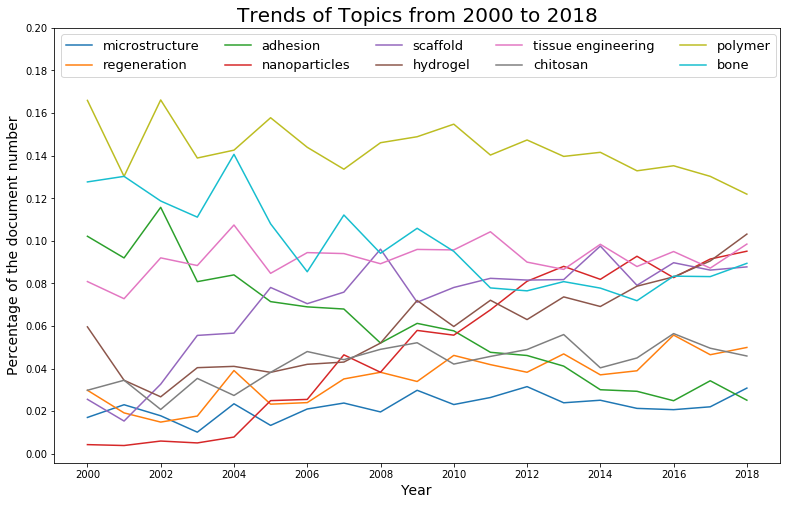

In [33]:
# column_name_0=['microstructure','regeneration']
# column_name_0=['polymerization','implantation','microstructure','regeneration']
column_name_0=['microstructure','regeneration','adhesion','nanoparticles','scaffold','hydrogel','tissue engineering','chitosan','polymer','bone']
plt.figure(figsize=(13,8))

for column in df_res.drop('year', axis=1):
    plt.plot(df_res['year'], df_res[column], label=column)
plt.legend(column_name_0, ncol=5,loc=2,prop={'size': 13})

plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of the document number', fontsize=14)
plt.xticks(np.arange(2000, 2020, 2))
# plt.yticks(np.arange(0.00, 0.42, 0.02))
plt.yticks(np.arange(0.00, 0.22, 0.02))

# plt.title('Trends of Topics from 2000 to 2018 in Review Documents',fontsize=20)
plt.title('Trends of Topics from 2000 to 2018',fontsize=20)
# plt.savefig('reg_mic_four_review.png')
# plt.savefig('Trends of Topics from 2000 to 2018 in review.png')

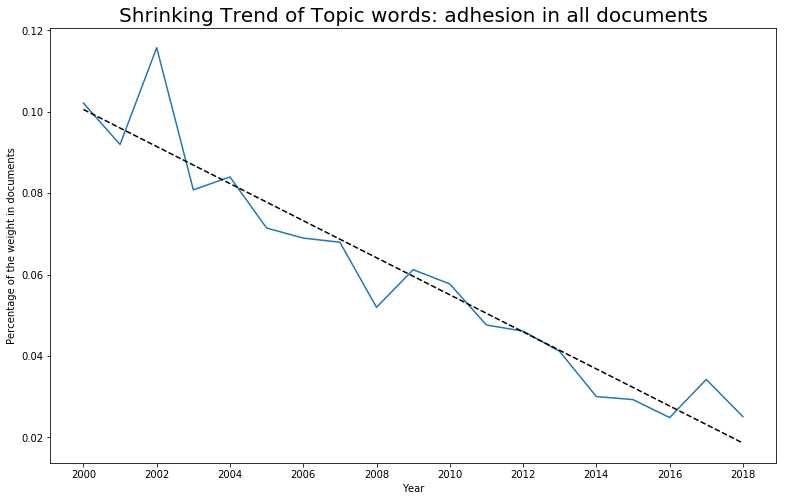

In [35]:
plt.figure(figsize=(13,8))
x=df_res['year']
# y=df_res['polymerization']
y=df_res['adhesion']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, x, fit_fn(x), '--k')
plt.xticks(np.arange(2000, 2020, 2))
plt.xlabel('Year')
plt.ylabel('Percentage of the weight in documents')
plt.title('Shrinking Trend of Topic words: adhesion in all documents' ,fontsize=20)
plt.savefig('adhesion_linear regression.png')
# plt.ylim(0, 12)

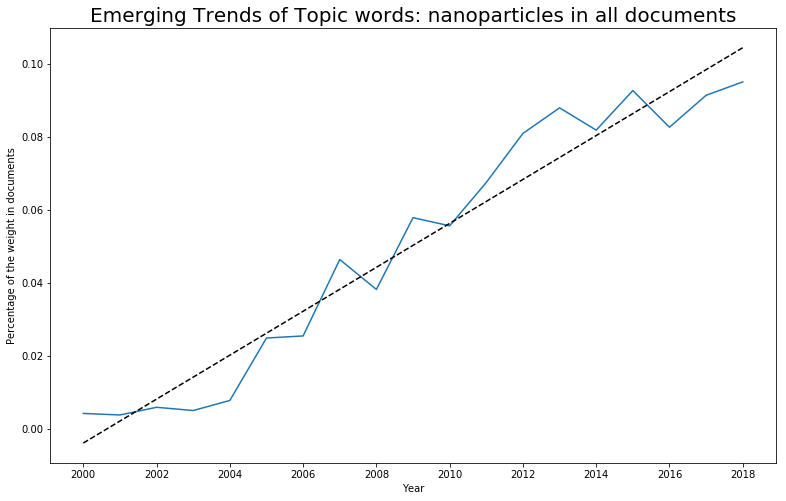

In [36]:
plt.figure(figsize=(13,8))
x=df_res['year']
# y=df_res['implantation']
y=df_res['nanoparticles']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, x, fit_fn(x), '--k')
plt.xticks(np.arange(2000, 2020, 2))
plt.xlabel('Year')
plt.ylabel('Percentage of the weight in documents')
plt.title('Emerging Trends of Topic words: nanoparticles in all documents' ,fontsize=20)
plt.savefig('nano_linear regression.png')
# plt.ylim(0, 12)

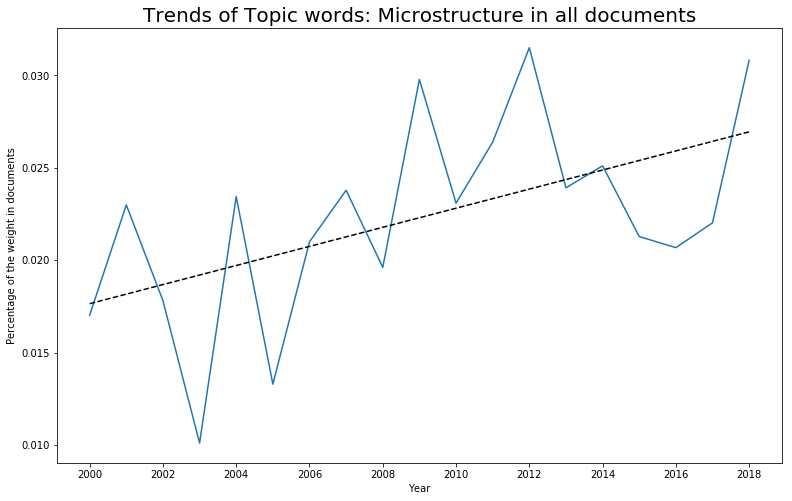

In [62]:
plt.figure(figsize=(13,8))
x=df_res['year']
y=df_res['microstructure']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, x, fit_fn(x), '--k')
plt.xticks(np.arange(2000, 2020, 2))
plt.xlabel('Year')
plt.ylabel('Percentage of the weight in documents')
plt.title('Trends of Topic words: Microstructure in all documents' ,fontsize=20)
plt.savefig('mic_linear regression.png')
# plt.ylim(0, 12)

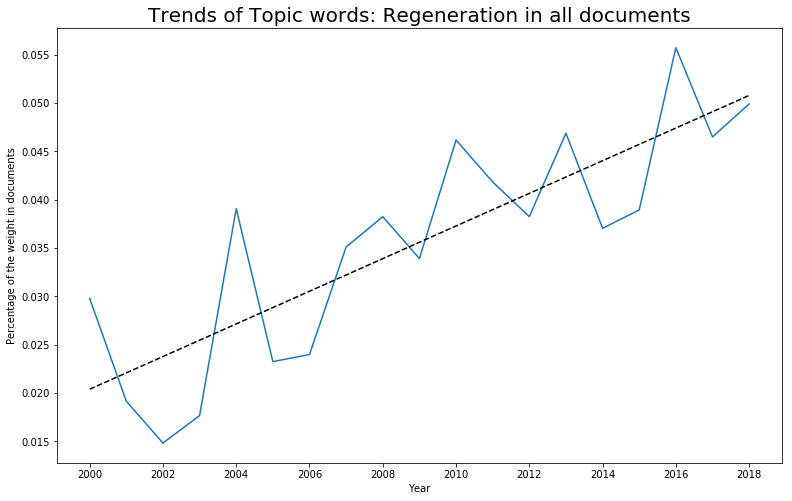

In [63]:
plt.figure(figsize=(13,8))
x=df_res['year']
y=df_res['regeneration']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, x, fit_fn(x), '--k')
plt.xticks(np.arange(2000, 2020, 2))
plt.xlabel('Year')
plt.ylabel('Percentage of the weight in documents')
plt.title('Trends of Topic words: Regeneration in all documents' ,fontsize=20)
plt.savefig('reg_linear regression.png')
# plt.xlim(2000, 2020)
# plt.ylim(0, 12)

In [ ]:
# Various line types, plot symbols and colors may be obtained with
#     plot(X,Y,S) where S is a character string made from one element
#     from any or all the following 3 columns:
#              b     blue          .     point              -     solid
#              g     green         o     circle             :     dotted
#              r     red           x     x-mark             -.    dashdot 
#              c     cyan          +     plus               --    dashed   
#              m     magenta       *     star             (none)  no line
#              y     yellow        s     square
#              k     black         d     diamond
#              w     white         v     triangle (down)
#                                  ^     triangle (up)
#                                  <     triangle (left)
#                                  >     triangle (right)
#                                  p     pentagram
#                                  h     hexagram

In [114]:
# from itertools import islice

# def take(n, iterable):
#     "Return first n items of the iterable as a list"
#     return list(islice(iterable, n))

In [144]:
# d = {'a': 3, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
# n_items = take(2, d.items())
# n_items

In [182]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = [1,2,3,4]
# y = [3,5,7,11] # 10, not 9, so the fit isn't perfect

# fit = np.polyfit(x,y,1)
# fit_fn = np.poly1d(fit) 
# # fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
# plt.xlim(0, 5)
# plt.ylim(0, 12)